In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_store = pd.read_csv(r"D:\DATA\stores.csv")
df_train = pd.read_csv(r"D:\DATA\train.csv")
df_features = pd.read_csv(r"D:\DATA\features.csv")

In [19]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [20]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [21]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [22]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [23]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)

In [24]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [21]:
df.shape

(421570, 16)

In [22]:
# num of stores
df['Store'].nunique()


45

In [23]:
print(df['Dept'].nunique())
df['Dept'].unique()

81


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [24]:
#losses
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


In [27]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 16)

In [28]:
# Assuming 'df' is your DataFrame
pd.concat([df['Date'].head(1), df['Date'].tail(1)])

0        2010-02-05
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

In [29]:
#Holiday's date
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [30]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [31]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


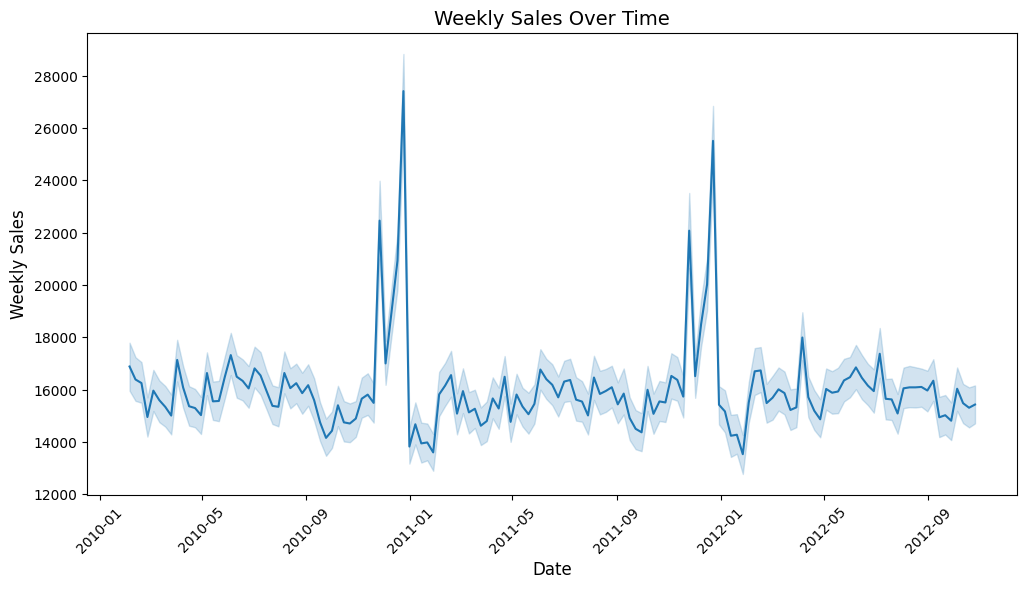

In [30]:
plt.figure(figsize=(12,6))

sns.lineplot(x='Date', y='Weekly_Sales', data=df)

plt.title('Weekly Sales Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.xticks(rotation=45)  

plt.show()

In [33]:

daily_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()


top_10 = daily_sales.nlargest(10, 'Weekly_Sales')


print("top 10 weeks for Weekly Sales")
for index, row in top_10.iterrows():
    print(f"📅 {row['Date'].date()} - 💰 {row['Weekly_Sales']:.2f}")

top 10 weeks for Weekly Sales
📅 2010-12-24 - 💰 80931586.20
📅 2011-12-23 - 💰 76999773.57
📅 2011-11-25 - 💰 66593835.85
📅 2010-11-26 - 💰 65821216.26
📅 2010-12-17 - 💰 61821317.85
📅 2011-12-16 - 💰 60086723.16
📅 2010-12-10 - 💰 55667840.03
📅 2011-12-09 - 💰 55561557.73
📅 2012-04-06 - 💰 53502476.06
📅 2012-07-06 - 💰 51253625.62


In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week

In [35]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9


In [34]:
# 🎄 1. موسم عيد الميلاد (Christmas Season)
# 2010-12-24

# 2011-12-23

# 2010-12-17

# 2011-12-16

# 2010-12-10

# 2011-12-09
##########################################
# 🛍️ 2. الجمعة السوداء (Black Friday)
# 2011-11-25

# 2010-11-26
#########################################
# 📅 3. تواريخ غير مرتبطة بمواسم واضحة
# 2012-04-06

# 2012-07-06

# 🔹 الاحتمالات الممكنة:

# 6 أبريل 2012

# قد يكون بسبب عيد الفصح (Easter) في 8 أبريل 2012، مما أدى إلى ارتفاع مبيعات الحلوى والهدايا.

# 6 يوليو 2012

# قريب جدًا من احتفالات 4 يوليو (عيد الاستقلال الأمريكي)، حيث يشتري الناس مستلزمات الحفلات والشواء.

In [36]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [37]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [38]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [39]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [40]:
# Black Friday dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'BlackFriday'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'BlackFriday'] = False

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64


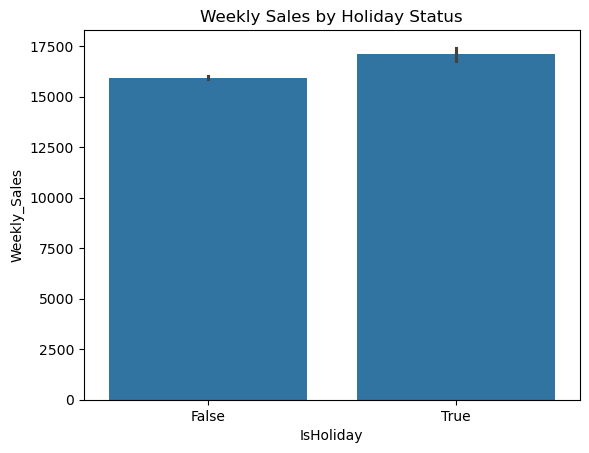

In [41]:
print(df.groupby('IsHoliday')['Weekly_Sales'].mean())

sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title("Weekly Sales by Holiday Status")
plt.show()

BlackFriday
False    15943.601687
True     22269.601768
Name: Weekly_Sales, dtype: float64


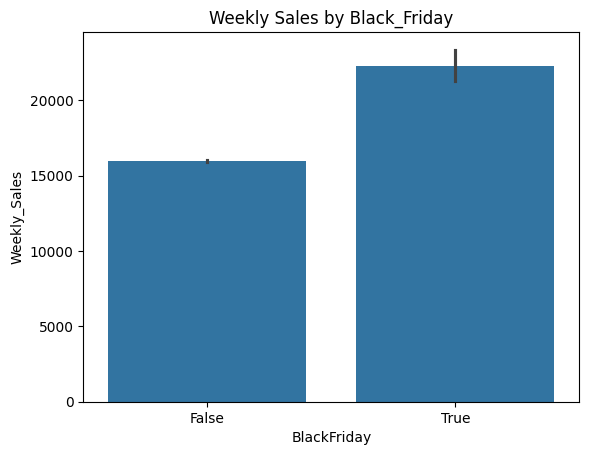

In [41]:
print(df.groupby('BlackFriday')['Weekly_Sales'].mean())
sns.barplot(x='BlackFriday', y='Weekly_Sales', data=df)
plt.title("Weekly Sales by Black_Friday")
plt.show()

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

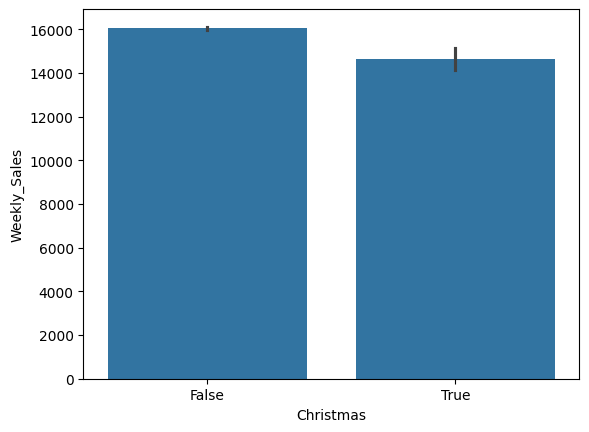

In [42]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

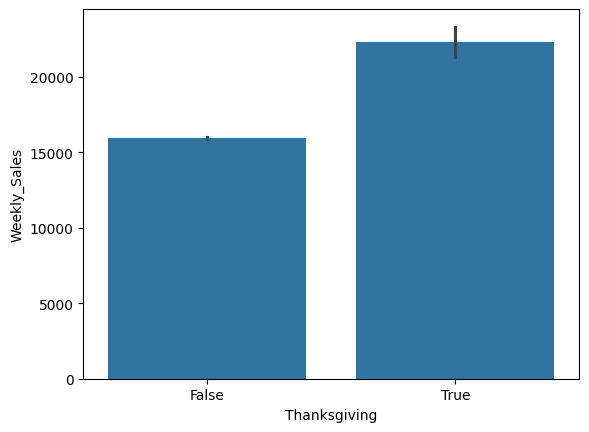

In [43]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

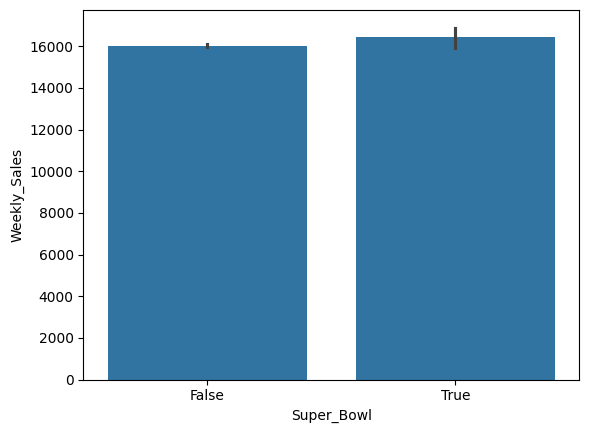

In [44]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

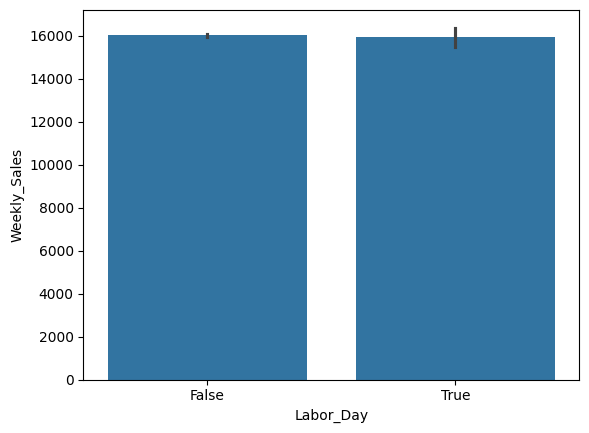

In [45]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)

In [46]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
year                 0
month                0
week                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
BlackFriday          0
dtype: int64

In [47]:
df = df.fillna(0)
df.isna().sum()

C:\Users\ZBook G5\AppData\Local\Temp\ipykernel_7264\140701407.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
month           0
week            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
BlackFriday     0
dtype: int64

In [48]:
df.describe().round()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year,month,week
count,420212.0,420212.0,420212,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0,420212.0
mean,22.0,44.0,2011-06-18 07:35:12.682169600,16033.0,60.0,3.0,2590.0,879.0,469.0,1084.0,1663.0,171.0,8.0,136750.0,2011.0,6.0,26.0
min,1.0,1.0,2010-02-05 00:00:00,0.0,-2.0,2.0,0.0,-266.0,-29.0,0.0,0.0,126.0,4.0,34875.0,2010.0,1.0,1.0
25%,11.0,18.0,2010-10-08 00:00:00,2120.0,47.0,3.0,0.0,0.0,0.0,0.0,0.0,132.0,7.0,93638.0,2010.0,4.0,14.0
50%,22.0,37.0,2011-06-17 00:00:00,7662.0,62.0,3.0,0.0,0.0,0.0,0.0,0.0,182.0,8.0,140167.0,2011.0,6.0,26.0
75%,33.0,74.0,2012-02-24 00:00:00,20271.0,74.0,4.0,2809.0,2.0,5.0,425.0,2168.0,212.0,9.0,202505.0,2012.0,9.0,38.0
max,45.0,99.0,2012-10-26 00:00:00,693099.0,100.0,4.0,88647.0,104520.0,141631.0,67475.0,108519.0,227.0,14.0,219622.0,2012.0,12.0,52.0
std,13.0,31.0,NaN,22729.0,18.0,0.0,6053.0,5077.0,5534.0,3896.0,4206.0,39.0,2.0,60993.0,1.0,3.0,14.0


In [49]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'year', 'month',
       'week', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas',
       'BlackFriday'],
      dtype='object')


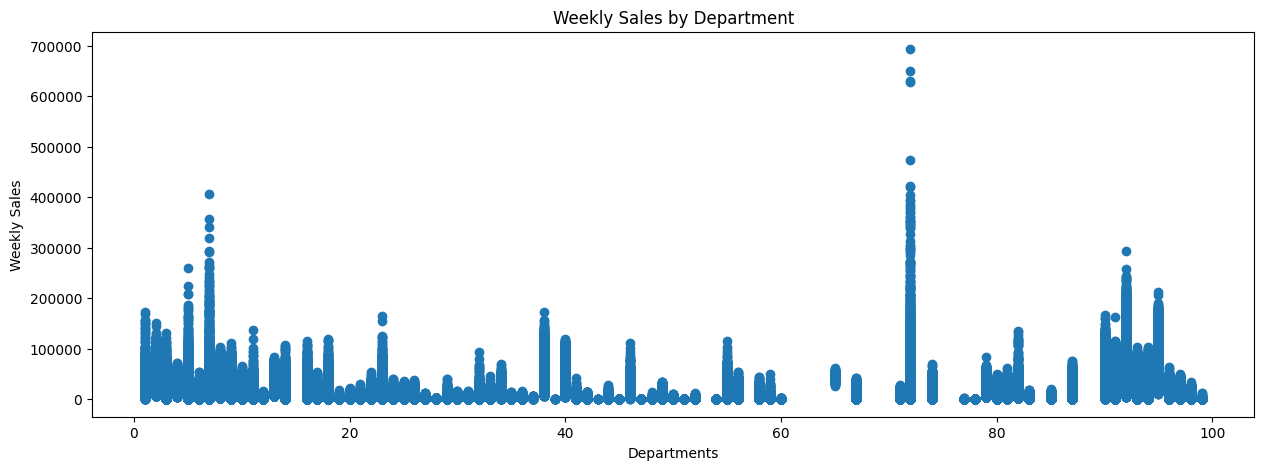

In [50]:
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(df['Dept'],df['Weekly_Sales'])
plt.show()

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

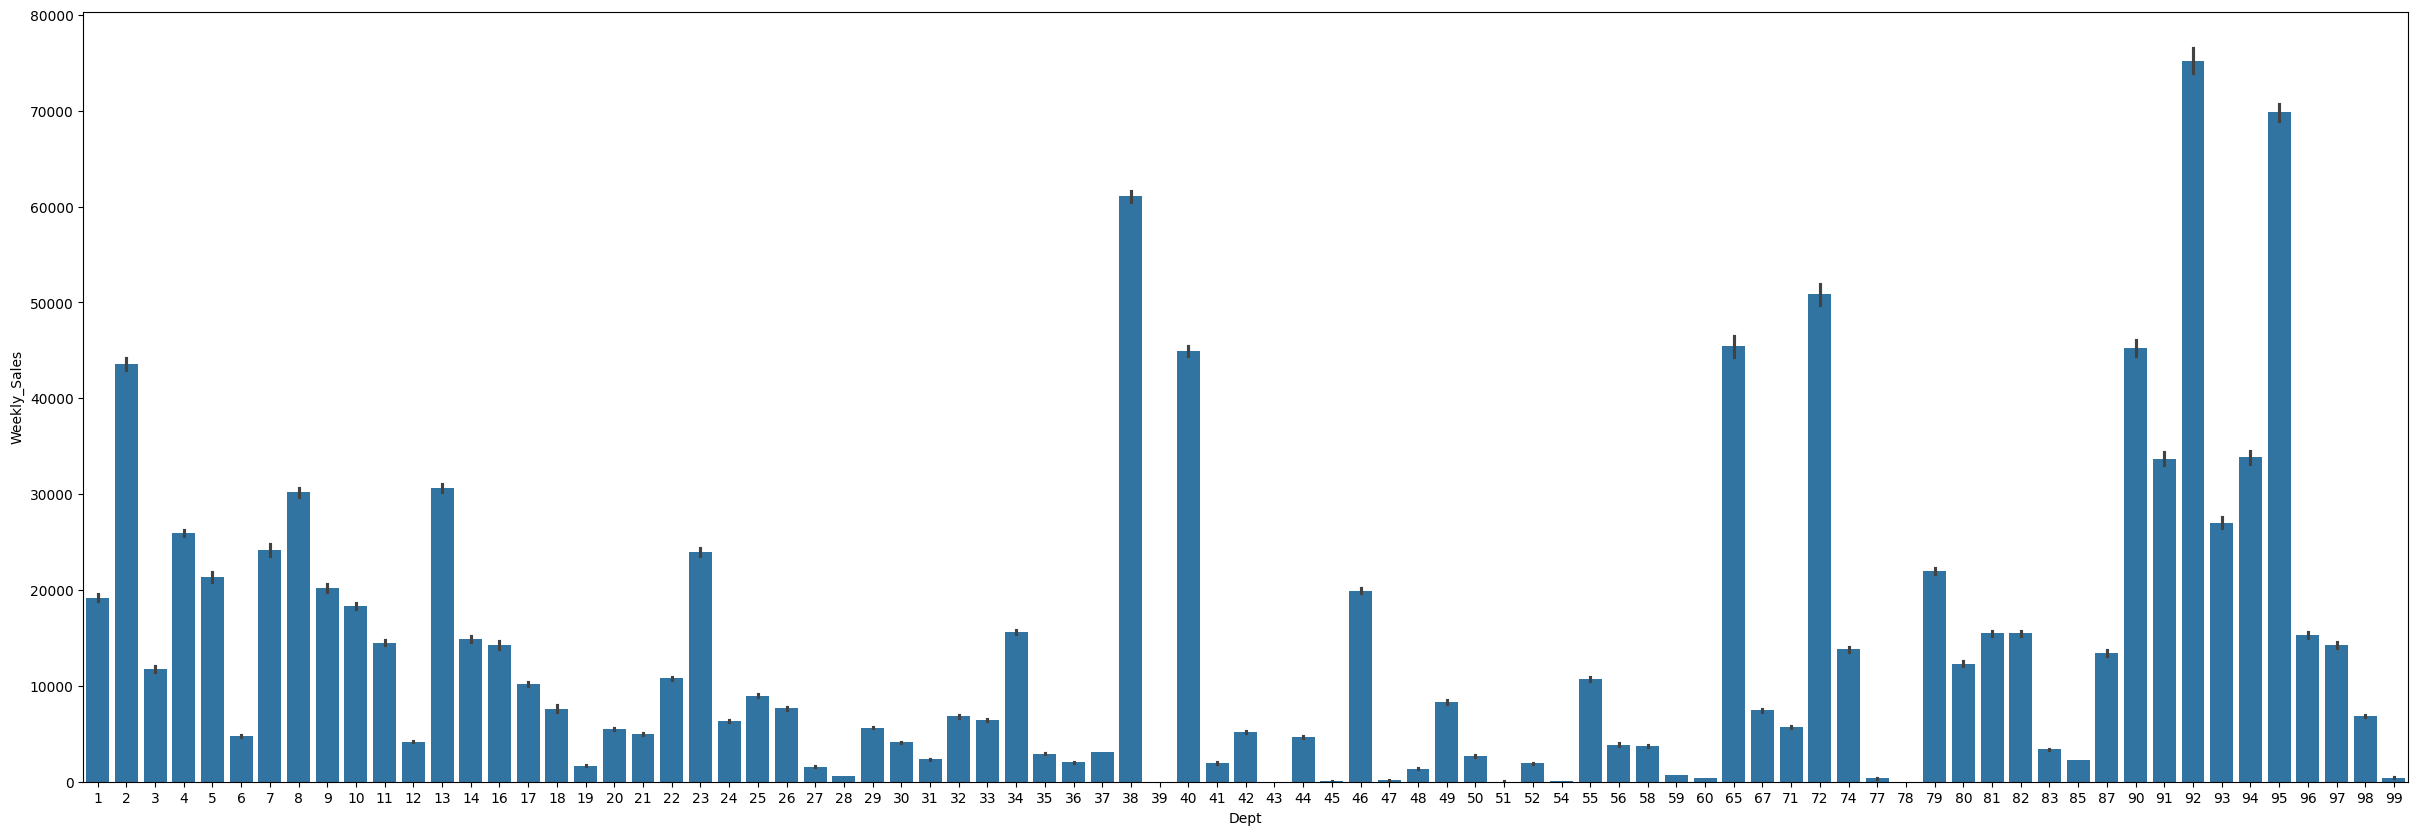

In [51]:
#AVG sales for each dept
plt.figure(figsize=(30,10))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)

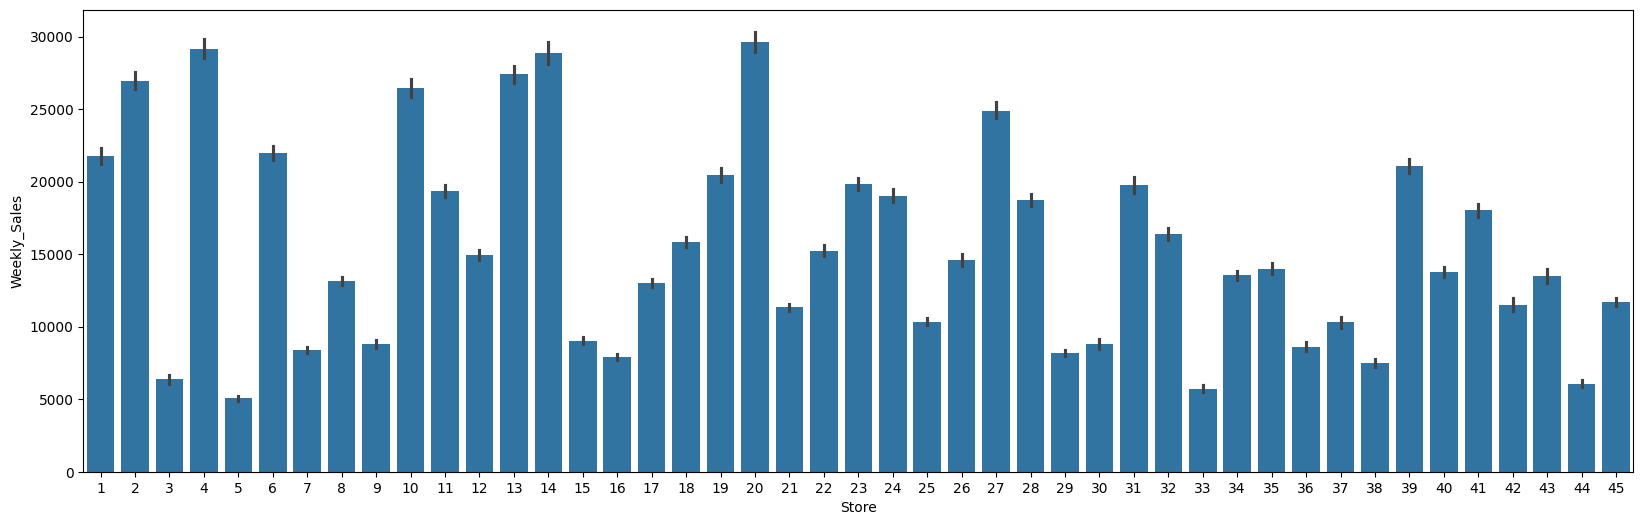

In [52]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [53]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [54]:
df.groupby('month')['Weekly_Sales'].mean().round()

month
1     14182.0
2     16049.0
3     15465.0
4     15696.0
5     15846.0
6     16398.0
7     15905.0
8     16114.0
9     15147.0
10    15279.0
11    17535.0
12    19426.0
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

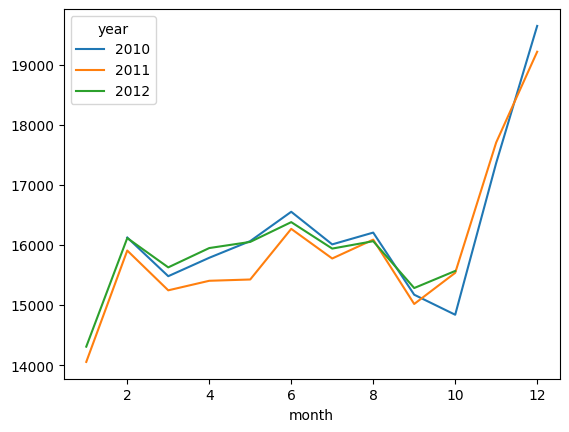

In [55]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

<Axes: xlabel='month', ylabel='Weekly_Sales'>

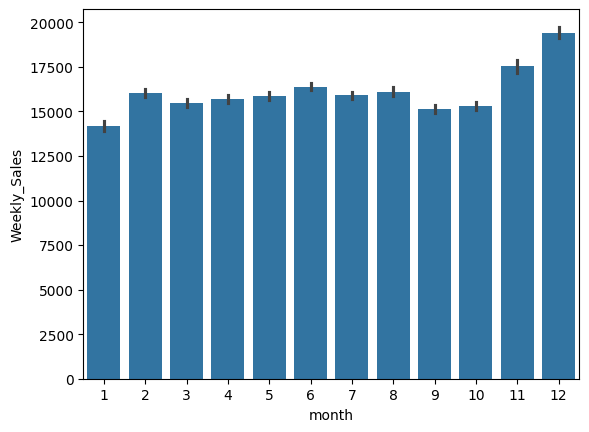

In [56]:
sns.barplot(x='month', y='Weekly_Sales', data=df)

<Axes: xlabel='week'>

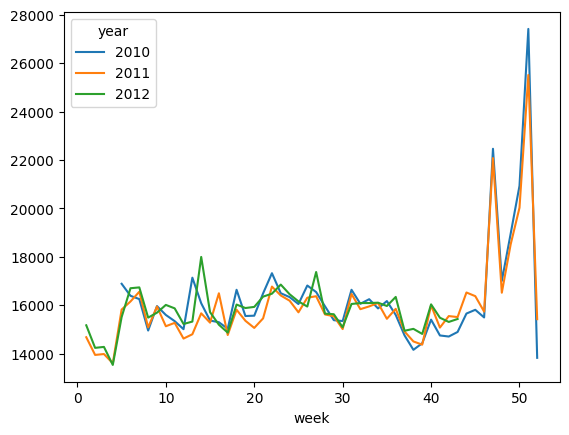

In [57]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

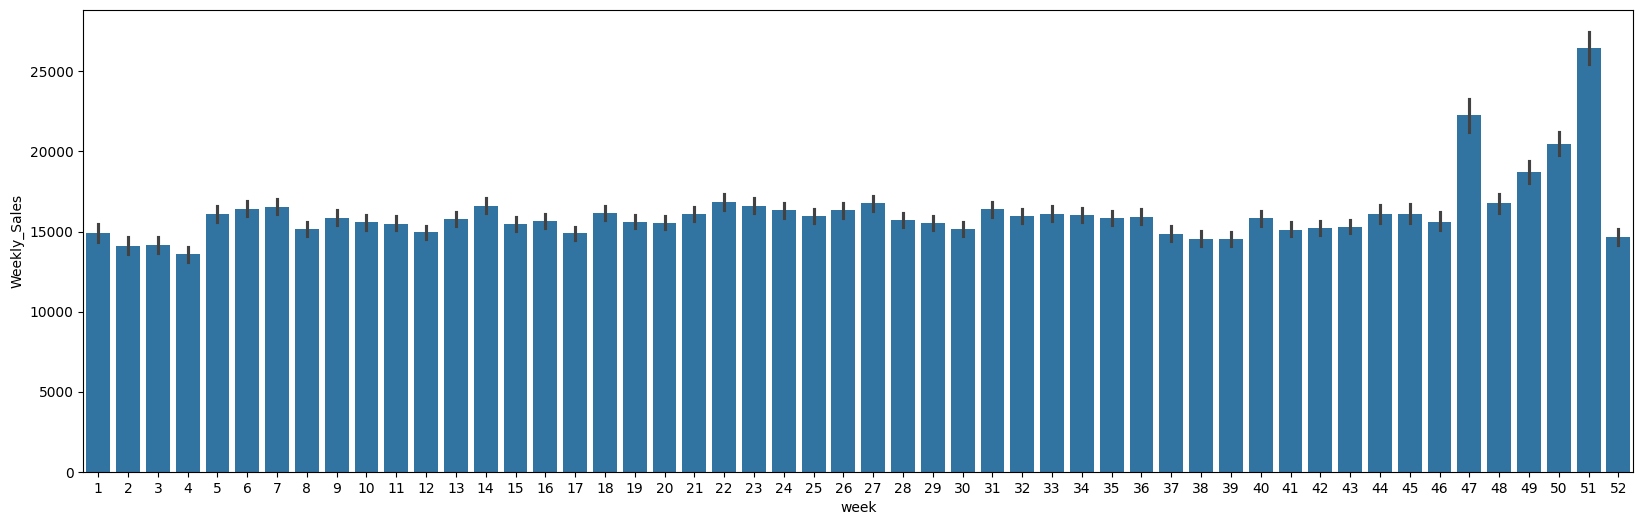

In [58]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

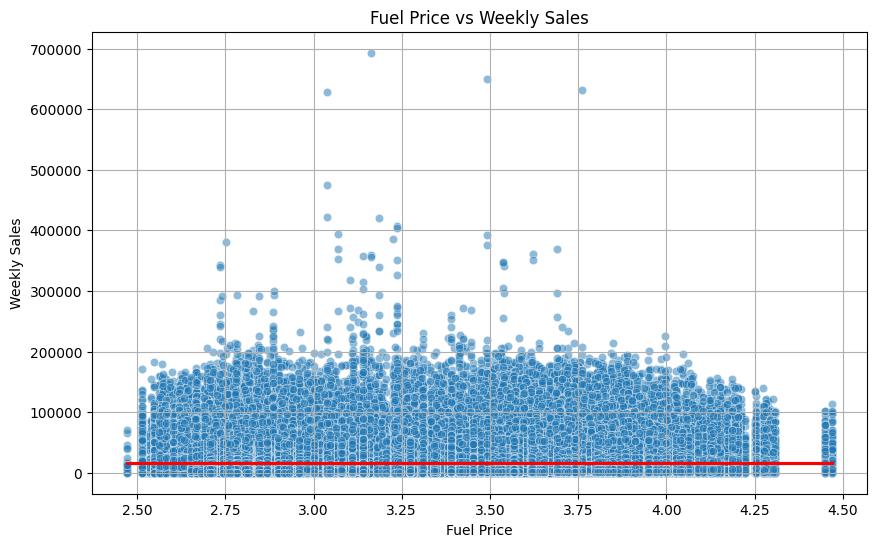

In [59]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.5)
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, scatter=False, color='red') 
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

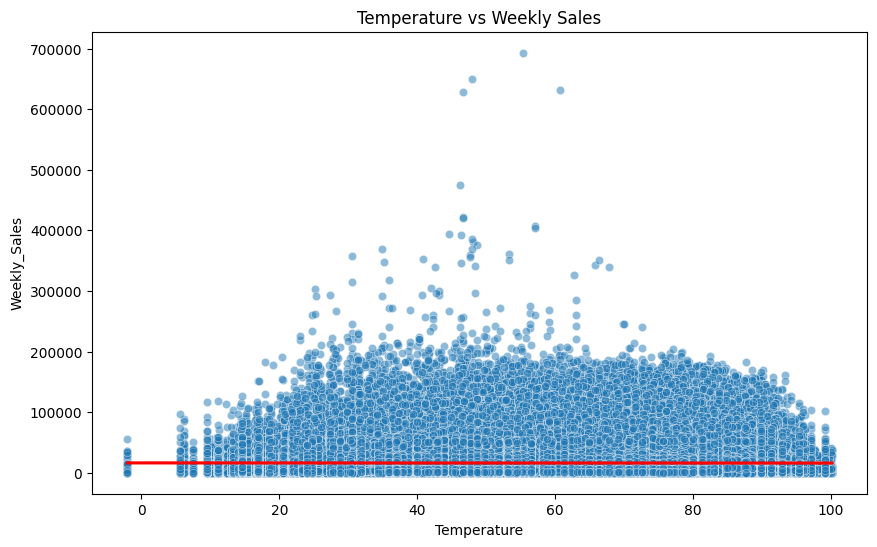

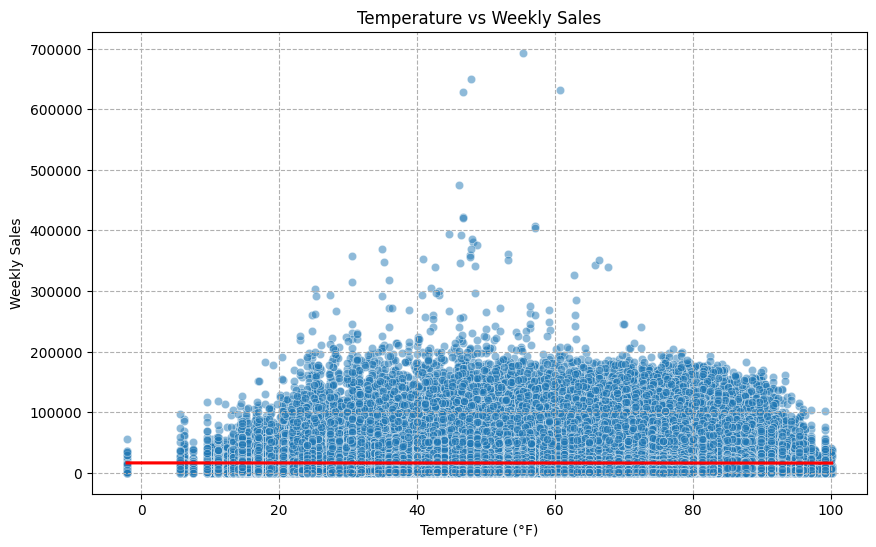

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)  # النقاط
sns.regplot(x='Temperature', y='Weekly_Sales', data=df, scatter=False, color='red')  # خط الاتجاه


plt.title('Temperature vs Weekly Sales')
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)  # النقاط
sns.regplot(x='Temperature', y='Weekly_Sales', data=df, scatter=False, color='red')  # خط الاتجاه

plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)') 
plt.ylabel('Weekly Sales')
plt.grid(True, linestyle='--')


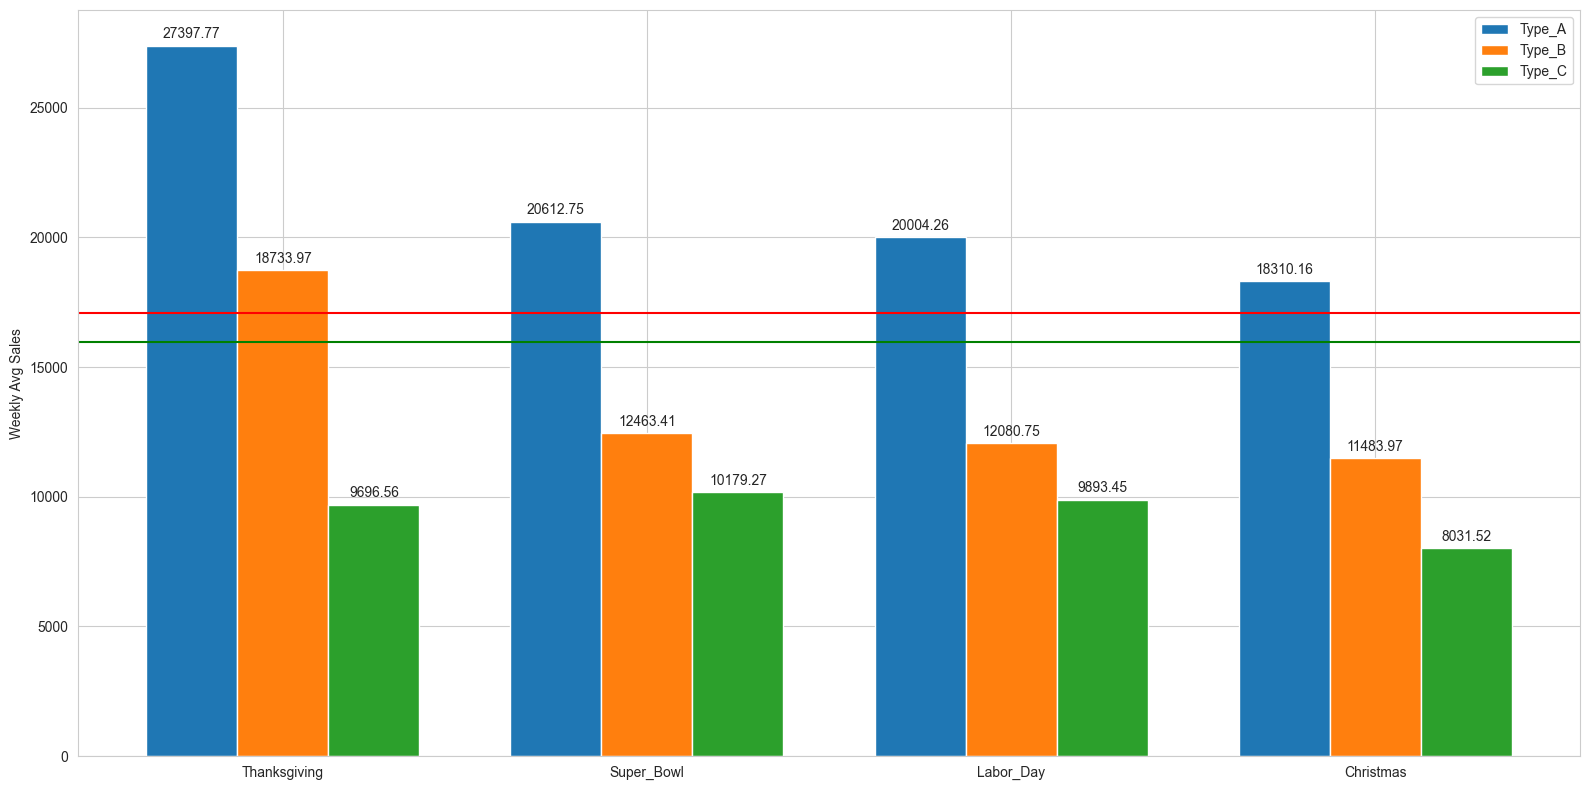

In [65]:
# Plotting avg wekkly sales according to holidays by types
import seaborn as sns
sns.set_style("whitegrid")  

labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [66]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


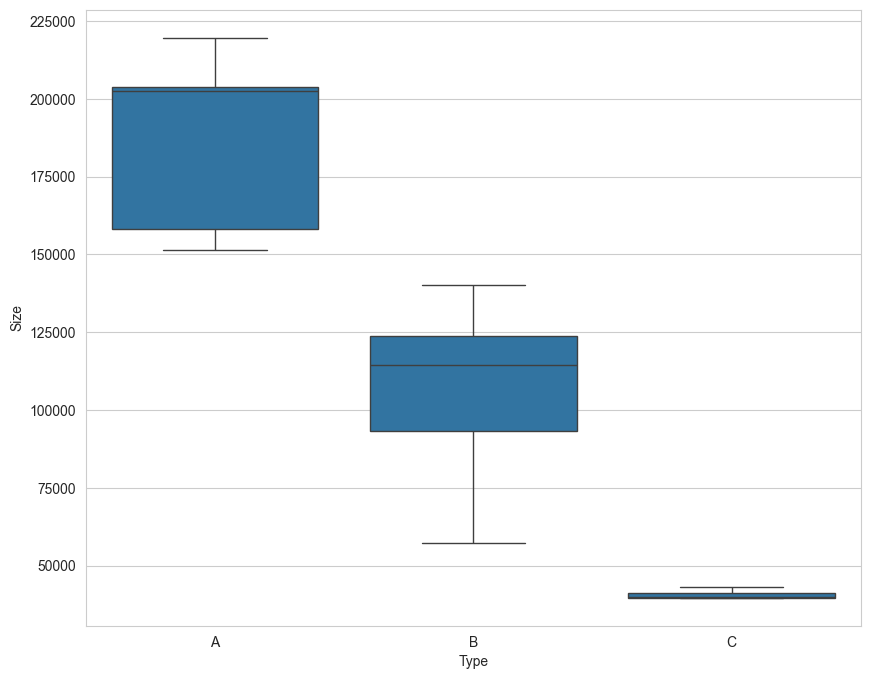

In [67]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

<Axes: xlabel='Fuel_Price'>

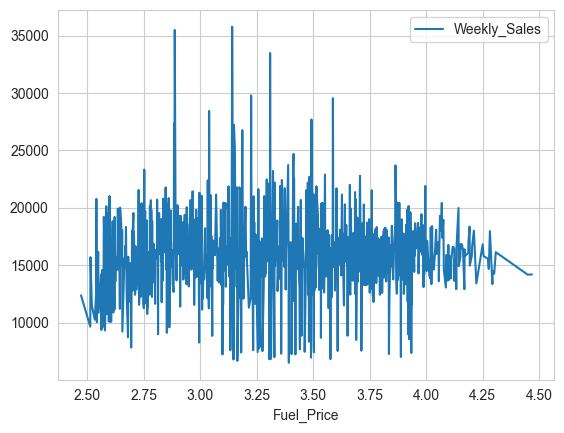

In [68]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

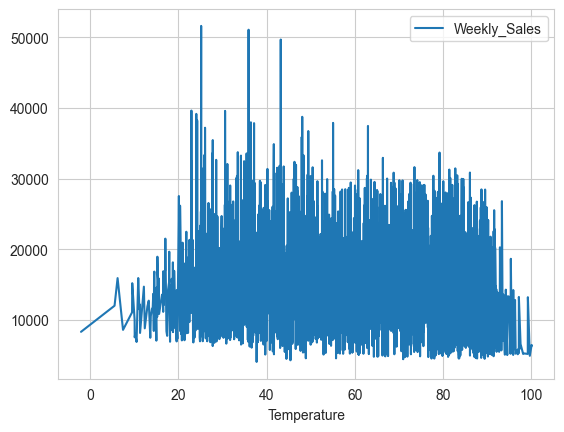

In [69]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

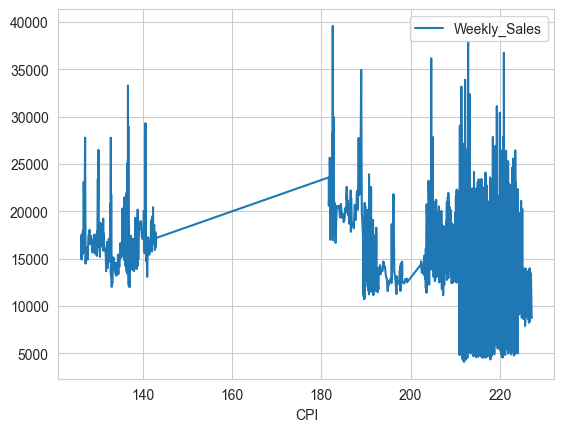

In [70]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

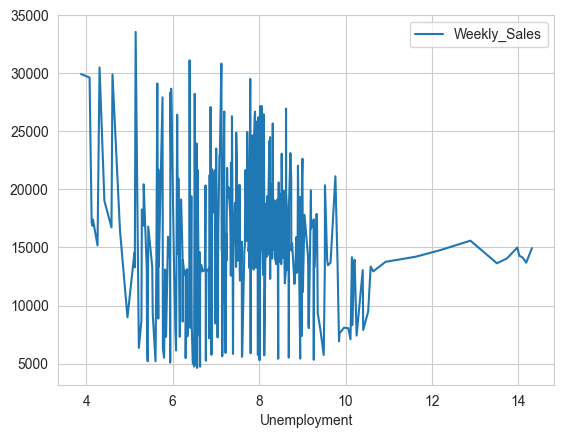

In [71]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [72]:
df.to_csv('D:\clean_data_2.csv') # assign new data frame to csv for using after here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("D:\clean_data_2.csv")
data.tail()
data= data.drop("Unnamed: 0",axis=1)
data.iloc[20:25].T


<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\youss\AppData\Local\Temp\ipykernel_21392\3839884831.py:1: SyntaxWarning: invalid escape sequence '\c'
  data= pd.read_csv("D:\clean_data_2.csv")


,20,21,22,23,24
Store,1,1,1,1,1
Dept,1,1,1,1,1
Date,2010-06-25,2010-07-02,2010-07-09,2010-07-16,2010-07-23
Weekly_Sales,16328.72,16333.14,17688.76,17150.84,15360.45
IsHoliday,False,False,False,False,False
Temperature,84.34,80.91,80.48,83.15,83.36
Fuel_Price,2.653,2.669,2.642,2.623,2.608
MarkDown1,0.0,0.0,0.0,0.0,0.0
MarkDown2,0.0,0.0,0.0,0.0,0.0
MarkDown3,0.0,0.0,0.0,0.0,0.0


In [3]:

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [4]:
df_encoded = data.copy() # to keep original dataframe taking copy of it
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['BlackFriday'] = df_encoded['BlackFriday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

C:\Users\youss\AppData\Local\Temp\ipykernel_21392\1411531910.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Type'] = df_encoded['Type'].replace(type_group)


In [5]:
features = df_new.drop(columns=['Weekly_Sales','Date'])
target = df_new['Weekly_Sales']

In [6]:
features.head(5)
# features.iloc[20:50]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,BlackFriday
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,1,151315,2010,2,5,0,0,0,0,0
1,1,1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,1,151315,2010,2,6,1,0,0,0,0
2,1,1,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,1,151315,2010,2,7,0,0,0,0,0
3,1,1,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,...,1,151315,2010,2,8,0,0,0,0,0
4,1,1,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,...,1,151315,2010,3,9,0,0,0,0,0


In [7]:
# Create a OneHotEncoder for categorical features
categorical_features = ['Store', 'Dept', 'Type', 'IsHoliday', 'year', 'month', 'week']  # List categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # handle_unknown='ignore' for unseen values in test data

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(features[categorical_features])

# Create a DataFrame from the encoded features
df_encoded

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,year,month,week,Super_Bowl,Labor_Day,Thanksgiving,Christmas,BlackFriday
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.00,...,1,151315,2010,2,5,0,0,0,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.00,0.00,0.00,...,1,151315,2010,2,6,1,0,0,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.00,0.00,0.00,...,1,151315,2010,2,7,0,0,0,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.00,0.00,0.00,...,1,151315,2010,2,8,0,0,0,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.00,0.00,0.00,...,1,151315,2010,3,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,...,2,118221,2012,9,39,0,0,0,0,0
420208,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,...,2,118221,2012,10,40,0,0,0,0,0
420209,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,...,2,118221,2012,10,41,0,0,0,0,0
420210,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,...,2,118221,2012,10,42,0,0,0,0,0


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [9]:
import time

$$
\mathrm{Model: Random -Forest- Regression} 

$$


In [10]:
# Start time
start_time = time.time()

rf_model_1 = RandomForestRegressor( n_estimators=30, max_depth=20, random_state=42, n_jobs=-1)

rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)

y_train_pred = rf_model_1.predict(X_train)
r_train = r2_score(y_train, y_train_pred)

rf_mse_1 = mean_squared_error(y_test, rf_pred_1)
r_test = r2_score(y_test, rf_pred_1)

# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("mean_squared_error: ", rf_mse_1)

Execution Time:  0.3619611382484436
mean_squared_error:  12427789.087658172


In [11]:
print("🎯 R2 of training:", r_train)
print("🎯 R2 of test:", r_test)

print("Variance:", r_train - r_test)

🎯 R2 of training: 0.9936652297290549
🎯 R2 of test: 0.9756702183554301
Variance: 0.017995011373624803


In [12]:
import joblib

joblib.dump((rf_model_1, X_train.columns.tolist()), "rf_model_compressed3.pkl", compress=3)

['rf_model_compressed3.pkl']

In [13]:
import shap

# خذ عينة صغيرة من X_test
X_test_sample = X_test.sample(n=100, random_state=42)

# استخدم TreeExplainer
explainer = shap.TreeExplainer(rf_model_1)
shap_values = explainer.shap_values(X_test_sample)

# بار بلوت
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

# Beeswarm
shap.summary_plot(shap_values, X_test_sample)

# Dependence plot لفيتشر معينة
shap.dependence_plot("CPI", shap_values, X_test_sample)


ModuleNotFoundError: No module named 'shap'

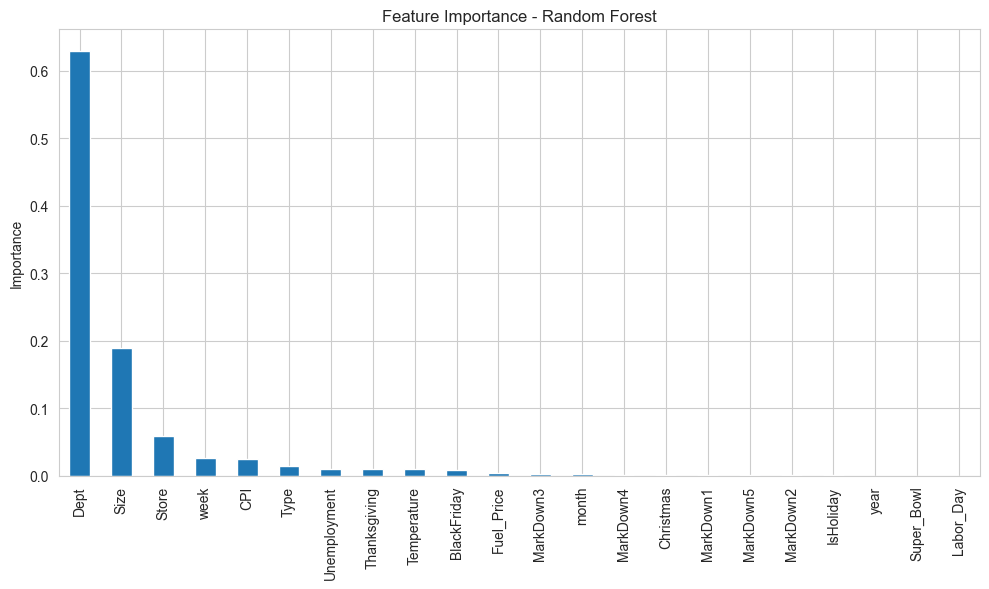

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# استخراج الـ importance
importances = rf_model_1.feature_importances_
feature_names = X_train.columns

# ترتيب النتائج
feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False)

# رسم البيانات
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [91]:
X_train.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'year', 'month', 'week', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'BlackFriday'],
      dtype='object')

.pkl


In [94]:
import joblib

joblib.dump(rf_model_1, 'final_random_forest_model.pkl')
print("✅ form saved to final_random_forest_model.pkl")


✅ form saved to final_random_forest_model.pkl


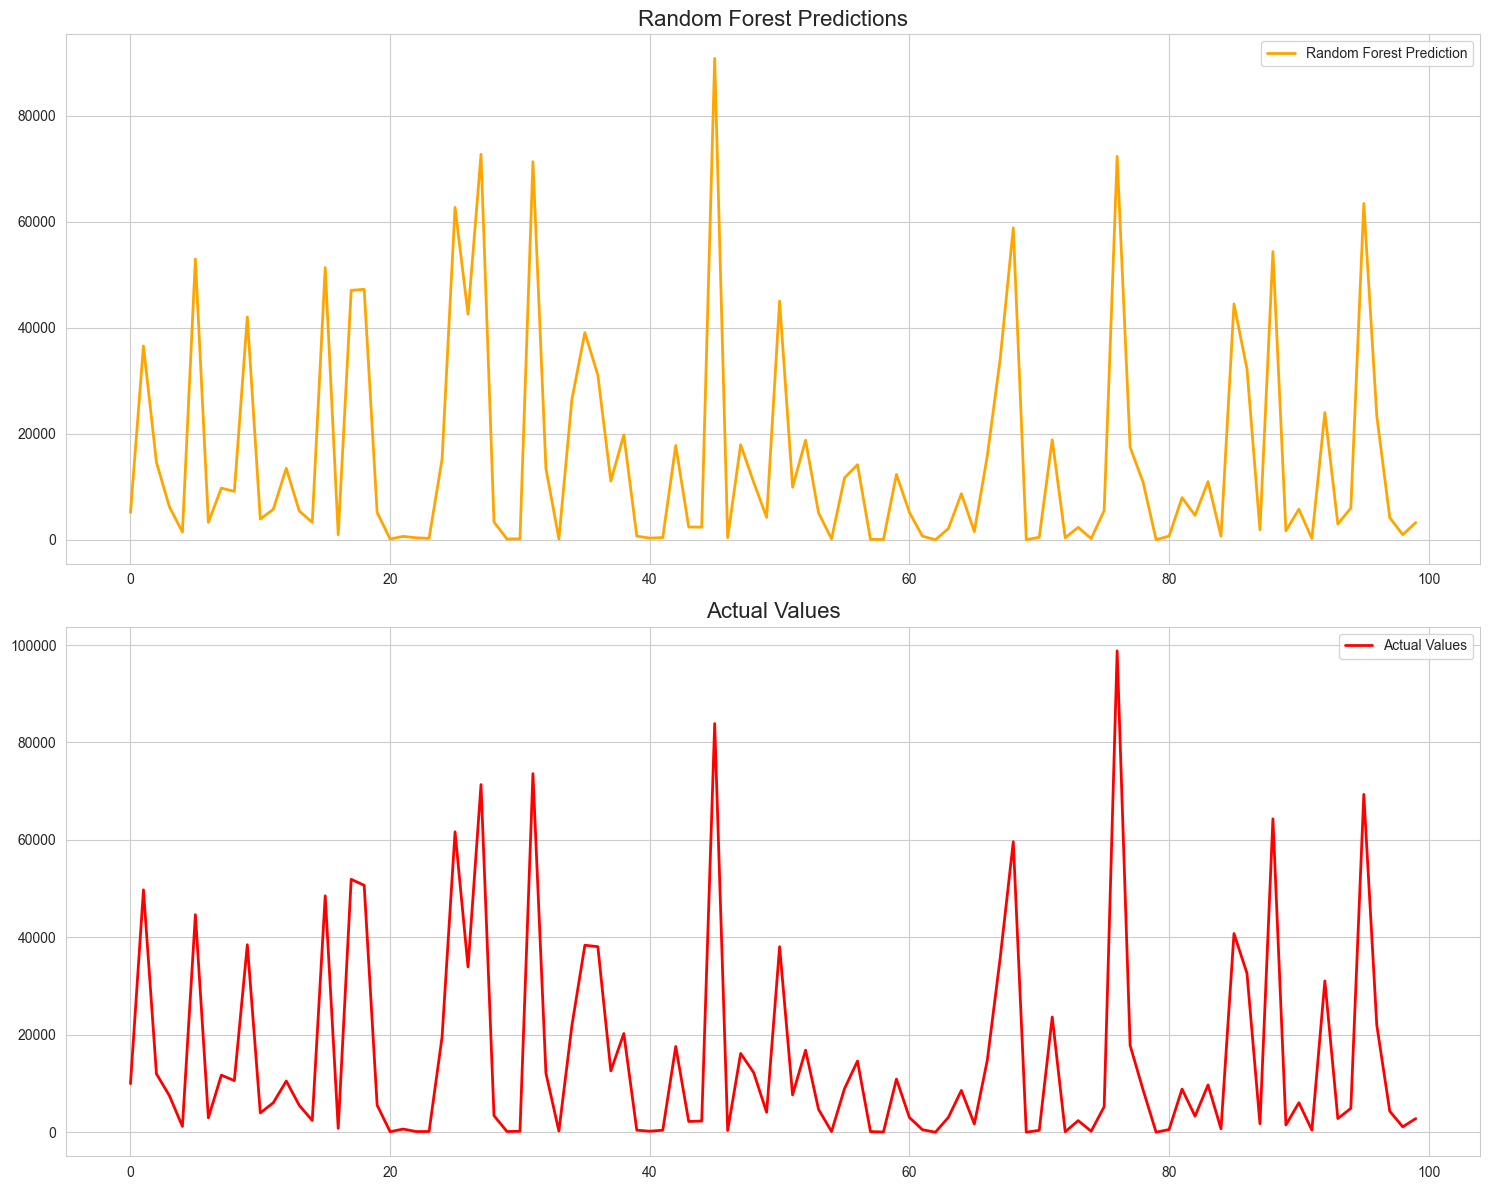

In [92]:
import matplotlib.pyplot as plt

# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values
rf_pred_subset = rf_pred_1[:n]

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# First subplot: Random Forest predictions
ax[0].plot(rf_pred_subset, label="Random Forest Prediction", linewidth=2.0, color='orange')
ax[0].set_title('Random Forest Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()